In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


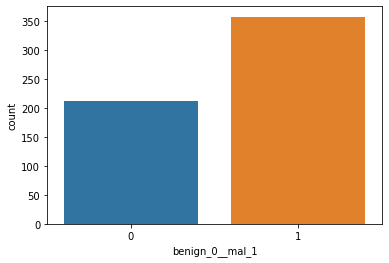

In [9]:
sns.countplot(x='benign_0__mal_1', data=df)
plt.show()

In [10]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


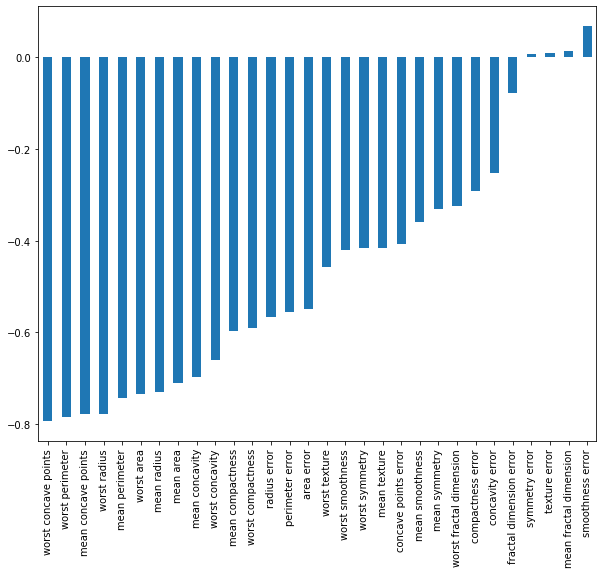

In [16]:
plt.figure(figsize=(10, 8))
df.corr()['benign_0__mal_1'].sort_values()[:-1].plot.bar()
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

result = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/500
426/426 [==============================] - 1s 3ms/sample - loss: 0.6767 - val_loss: 0.6586
Epoch 2/500
426/426 [==============================] - 0s 366us/sample - loss: 0.6413 - val_loss: 0.6268
Epoch 3/500
426/426 [==============================] - 0s 324us/sample - loss: 0.6093 - val_loss: 0.5880
Epoch 4/500
426/426 [==============================] - 0s 342us/sample - loss: 0.5678 - val_loss: 0.5412
Epoch 5/500
426/426 [==============================] - 0s 353us/sample - loss: 0.5226 - val_loss: 0.4928
Epoch 6/500
426/426 [==============================] - 0s 314us/sample - loss: 0.4774 - val_loss: 0.4465
Epoch 7/500
426/426 [==============================] - 0s 318us/sample - loss: 0.4334 - val_loss: 0.4015
Epoch 8/500
426/426 [==============================] - 0s 328us/sample - loss: 0.3904 - val_loss: 0.3600
Epoch 9/500
426/426 [==============================] - 0s 367us/sample - loss: 0.3496 - val_loss: 0.3253
Epoch 10/50

Epoch 78/500
426/426 [==============================] - 0s 330us/sample - loss: 0.0518 - val_loss: 0.0795
Epoch 79/500
426/426 [==============================] - 0s 383us/sample - loss: 0.0533 - val_loss: 0.0728
Epoch 80/500
426/426 [==============================] - 0s 384us/sample - loss: 0.0547 - val_loss: 0.0783
Epoch 81/500
426/426 [==============================] - 0s 357us/sample - loss: 0.0513 - val_loss: 0.0756
Epoch 82/500
426/426 [==============================] - 0s 378us/sample - loss: 0.0530 - val_loss: 0.0758
Epoch 83/500
426/426 [==============================] - 0s 424us/sample - loss: 0.0521 - val_loss: 0.0764
Epoch 84/500
426/426 [==============================] - 0s 398us/sample - loss: 0.0501 - val_loss: 0.0781
Epoch 85/500
426/426 [==============================] - 0s 488us/sample - loss: 0.0557 - val_loss: 0.0722
Epoch 86/500
426/426 [==============================] - 0s 384us/sample - loss: 0.0506 - val_loss: 0.0736
Epoch 87/500
426/426 [========================

Epoch 155/500
426/426 [==============================] - 0s 361us/sample - loss: 0.0393 - val_loss: 0.0765
Epoch 156/500
426/426 [==============================] - 0s 374us/sample - loss: 0.0381 - val_loss: 0.0713
Epoch 157/500
426/426 [==============================] - 0s 372us/sample - loss: 0.0373 - val_loss: 0.0753
Epoch 158/500
426/426 [==============================] - 0s 421us/sample - loss: 0.0373 - val_loss: 0.0763
Epoch 159/500
426/426 [==============================] - 0s 437us/sample - loss: 0.0371 - val_loss: 0.0688
Epoch 160/500
426/426 [==============================] - 0s 438us/sample - loss: 0.0370 - val_loss: 0.0775
Epoch 161/500
426/426 [==============================] - 0s 328us/sample - loss: 0.0380 - val_loss: 0.0717
Epoch 162/500
426/426 [==============================] - 0s 323us/sample - loss: 0.0365 - val_loss: 0.0777
Epoch 163/500
426/426 [==============================] - 0s 316us/sample - loss: 0.0364 - val_loss: 0.0719
Epoch 164/500
426/426 [==============

426/426 [==============================] - 0s 433us/sample - loss: 0.0309 - val_loss: 0.0735
Epoch 232/500
426/426 [==============================] - 0s 331us/sample - loss: 0.0305 - val_loss: 0.0785
Epoch 233/500
426/426 [==============================] - 0s 291us/sample - loss: 0.0298 - val_loss: 0.0735
Epoch 234/500
426/426 [==============================] - 0s 291us/sample - loss: 0.0334 - val_loss: 0.0797
Epoch 235/500
426/426 [==============================] - 0s 298us/sample - loss: 0.0312 - val_loss: 0.0811
Epoch 236/500
426/426 [==============================] - 0s 311us/sample - loss: 0.0289 - val_loss: 0.0716
Epoch 237/500
426/426 [==============================] - 0s 263us/sample - loss: 0.0313 - val_loss: 0.0774
Epoch 238/500
426/426 [==============================] - 0s 286us/sample - loss: 0.0304 - val_loss: 0.0784
Epoch 239/500
426/426 [==============================] - 0s 300us/sample - loss: 0.0302 - val_loss: 0.0726
Epoch 240/500
426/426 [============================

426/426 [==============================] - 0s 397us/sample - loss: 0.0257 - val_loss: 0.0770
Epoch 308/500
426/426 [==============================] - 0s 388us/sample - loss: 0.0275 - val_loss: 0.0859
Epoch 309/500
426/426 [==============================] - 0s 332us/sample - loss: 0.0277 - val_loss: 0.0776
Epoch 310/500
426/426 [==============================] - 0s 395us/sample - loss: 0.0260 - val_loss: 0.0790
Epoch 311/500
426/426 [==============================] - 0s 428us/sample - loss: 0.0244 - val_loss: 0.0799
Epoch 312/500
426/426 [==============================] - 0s 360us/sample - loss: 0.0284 - val_loss: 0.0739
Epoch 313/500
426/426 [==============================] - 0s 417us/sample - loss: 0.0314 - val_loss: 0.0784
Epoch 314/500
426/426 [==============================] - 0s 354us/sample - loss: 0.0303 - val_loss: 0.0854
Epoch 315/500
426/426 [==============================] - 0s 327us/sample - loss: 0.0251 - val_loss: 0.0820
Epoch 316/500
426/426 [============================

426/426 [==============================] - 0s 317us/sample - loss: 0.0209 - val_loss: 0.0838
Epoch 384/500
426/426 [==============================] - 0s 309us/sample - loss: 0.0209 - val_loss: 0.0850
Epoch 385/500
426/426 [==============================] - 0s 359us/sample - loss: 0.0200 - val_loss: 0.0847
Epoch 386/500
426/426 [==============================] - 0s 352us/sample - loss: 0.0200 - val_loss: 0.0849
Epoch 387/500
426/426 [==============================] - 0s 401us/sample - loss: 0.0208 - val_loss: 0.0928
Epoch 388/500
426/426 [==============================] - 0s 351us/sample - loss: 0.0203 - val_loss: 0.0838
Epoch 389/500
426/426 [==============================] - 0s 404us/sample - loss: 0.0206 - val_loss: 0.0822
Epoch 390/500
426/426 [==============================] - 0s 329us/sample - loss: 0.0219 - val_loss: 0.0975
Epoch 391/500
426/426 [==============================] - 0s 375us/sample - loss: 0.0213 - val_loss: 0.0809
Epoch 392/500
426/426 [============================

426/426 [==============================] - 0s 373us/sample - loss: 0.0184 - val_loss: 0.1095
Epoch 460/500
426/426 [==============================] - 0s 318us/sample - loss: 0.0211 - val_loss: 0.0884
Epoch 461/500
426/426 [==============================] - 0s 393us/sample - loss: 0.0184 - val_loss: 0.0953
Epoch 462/500
426/426 [==============================] - 0s 329us/sample - loss: 0.0164 - val_loss: 0.0871
Epoch 463/500
426/426 [==============================] - 0s 346us/sample - loss: 0.0180 - val_loss: 0.0997
Epoch 464/500
426/426 [==============================] - 0s 418us/sample - loss: 0.0171 - val_loss: 0.0884
Epoch 465/500
426/426 [==============================] - 0s 302us/sample - loss: 0.0192 - val_loss: 0.0907
Epoch 466/500
426/426 [==============================] - 0s 286us/sample - loss: 0.0219 - val_loss: 0.0910
Epoch 467/500
426/426 [==============================] - 0s 416us/sample - loss: 0.0193 - val_loss: 0.0963
Epoch 468/500
426/426 [============================

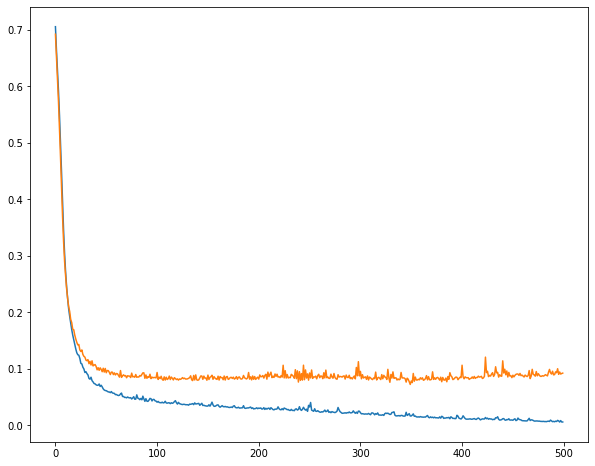

In [38]:
plt.figure(figsize=(10, 8))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.show()

list